___
# Ciência dos Dados - PROJETO 1

GABRIEL MOURA ALMEIDA

Análise do uso de aparelhos eletrônicos em domicílios de acordo com as faixas de renda mensais, no estado de São Paulo.

___
## Introdução

Acesso à internet e TV

Pretendo analisar e comparar o uso de aparelhos eletrônicos como: computadores, celulares e televisão em diferentes faixas de renda mensal no estado de São Paulo.

Variáveis de Interesse:
- Rendimento mensal domiciliar per capita
- Tem telefone móvel celular
- Tem televisão em cores
- Microcomputador é utilizado para acessar a Internet
- Existência de morador de 0 a 17 anos de idade


Filtro de Tipos de Domicílios
- Unidade da Federação
- Total de moradores
- Condição de ocupação do domicílio
- Código de situação censitária


___
## Análise e Resultados

In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')

In [53]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\Gabriel Moura\Documents\Insper\2 Semestre\Ciência dos Dados\Projeto 1\Ciencia-dos-Dados


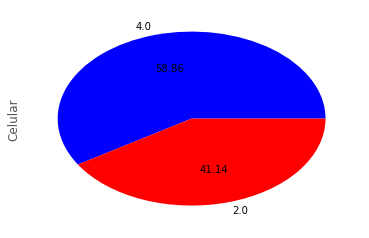

In [54]:
# Projeto1CD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dados = pd.read_csv("PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv")
#dados = pd.read_table("PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv", encoding="windows-1252", sep=",")
dados = pd.read_csv('PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv',sep=',')
dados = dados.rename(columns={"UF":"Estados","V0207":"Condição","V2020":"Celular","V4621":"Renda","V0226":"Televisão","V0232":"Microcomputador","V0105":"Total de moradores","V4105":"CódigoCensitário","V2123":"Menor"})
dados_resumidos = dados[dados.Estados == 35] #filtragem para São Paulo 

dados_resumidos = dados_resumidos.ix[:, ["Celular","Televisão","Microcomputador","Renda","Total de moradores","CódigoCensitário","Menor"]]
#dados_resumidos.Condição = dados_resumidos.Condição.astype('category') 
dados_resumidos.Celular = dados_resumidos.Celular.astype('category')
dados_resumidos.Televisão = dados_resumidos.Televisão.astype('category')
dados_resumidos.Microcomputador = dados_resumidos.Microcomputador.astype('category')
dados_resumidos.CódigoCensitário= dados_resumidos.CódigoCensitário.astype('category')
dados_resumidos.Menor = dados_resumidos.Menor.astype('category')
#dados_resumidos.Condição.cat.categories = ('Proprio Pago', 'Proprio Pagando','Alugado','Cedido por empregador','Cedido de outra forma','Outro')
dados_resumidos.Celular.cat.categories = ('Sim', 'Não')
dados_resumidos.Televisão.cat.categories = ('Sim', 'Não')
dados_resumidos.Microcomputador.cat.categories = ('Sim', 'Não')
dados_resumidos.CódigoCensitário.cat.categories = ('Urbana1','Urbana2','Urbana3','Rural1','Rural2','Rural3','Rural4')
dados_resumidos.Menor.cat.categories = ('Sim','Não')
#dados_resumidos= dados_resumidos[dados_resumidos.Condição.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Microcomputador.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Menor.notnull()]


dfc = dados.Celular.value_counts()
#dfc = dados.Celular.reindex(["Sim",  "Não"])
dfc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)






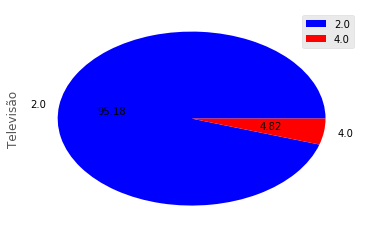

In [55]:
dfc1 = dados.Televisão.value_counts()
dfc1.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

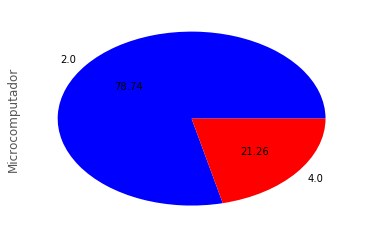

In [56]:
dfc2 = dados.Microcomputador.value_counts()
dfc2.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)

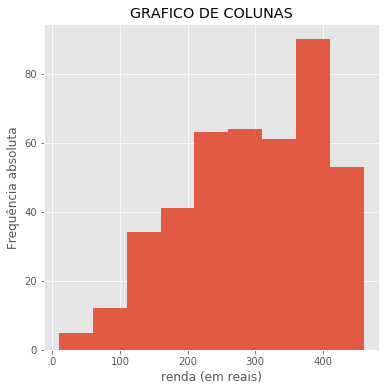

In [57]:
dados_resumidos.Renda.describe()
faixa = range(10,500,50)
Renda_cat = pd.cut(dados_resumidos.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100
plot = dados_resumidos.Renda.plot.hist(bins=faixa,title='GRAFICO DE COLUNAS', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')


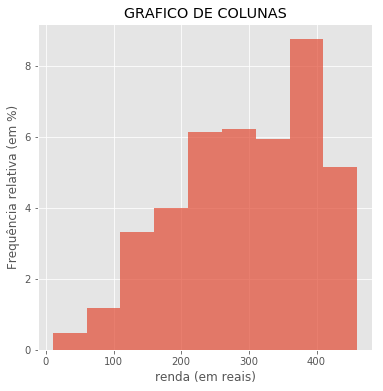

In [58]:
from numpy import zeros_like
plot = dados_resumidos.Renda.plot.hist(bins=faixa,title='GRAFICO DE COLUNAS', weights=zeros_like(dados_resumidos.Renda)+1./dados_resumidos.Renda.size*100, figsize=(6, 6), alpha=0.7)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda (em reais)')

In [59]:
dados_resumidos

,Celular,Televisão,Microcomputador,Renda,Total de moradores,CódigoCensitário,Menor
94204,Sim,Sim,Sim,1.000000e+12,4.0,Urbana1,Não
94207,Sim,Sim,Não,1.350000e+03,2.0,Urbana1,Não
94215,Sim,Sim,Sim,1.075000e+03,4.0,Urbana1,Não
94217,Não,Sim,Sim,1.500000e+03,4.0,Urbana1,Sim
94228,Sim,Sim,Sim,1.500000e+03,3.0,Urbana1,Sim
94230,Sim,Sim,Sim,5.750000e+02,4.0,Urbana1,Sim
94234,Sim,Sim,Sim,1.000000e+12,3.0,Urbana1,Sim
94239,Sim,Sim,Sim,6.250000e+02,4.0,Urbana1,Sim
94241,Sim,Sim,Sim,6.500000e+02,2.0,Urbana1,Não
94256,Sim,Sim,Sim,4.000000e+02,3.0,Urbana1,Sim


___
## Conclusão 

Descreva aqui suas conclusões!